<a href="https://colab.research.google.com/github/praveenwork/ml/blob/main/Practice/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-08 16:52:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2021-02-08 16:52:54 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

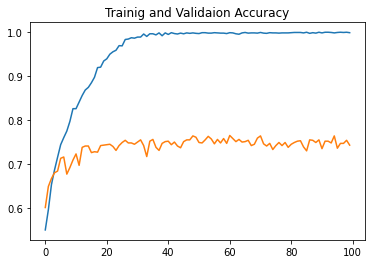

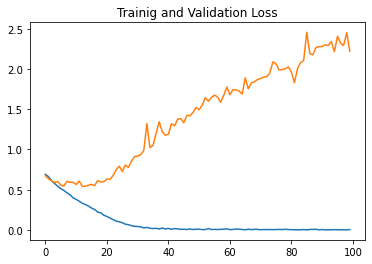

<Figure size 432x288 with 0 Axes>

In [3]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



#Extract the zip file and arrange Training and Validation dataset

localZipFile = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(localZipFile, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

training_base_dir = os.path.join(base_dir, "train")
validation_base_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(training_base_dir, "cats")
train_dog_dir = os.path.join(training_base_dir, "dogs")

validation_cat_dir = os.path.join(validation_base_dir, "cats")
validation_dog_dir = os.path.join(validation_base_dir, "dogs")

#define model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)

])

#compile
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=1e-4), metrics = ['accuracy'])

#model summary
model.summary()

# Training Data Generator
training_data_gen = ImageDataGenerator(rescale= 1./255)
train_generator = training_data_gen.flow_from_directory(
    training_base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

#validation data generator

validation_data_gen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_data_gen.flow_from_directory(
    validation_base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)


#plot the accuracy training vs validation

training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs, training_accuracy)
plt.plot(epochs, validation_accuracy)
plt.title('Trainig and Validaion Accuracy')
plt.figure()

plt.plot(epochs, training_loss)
plt.plot(epochs, validation_loss)
plt.title("Trainig and Validation Loss")
plt.figure()

plt.show()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 128)      

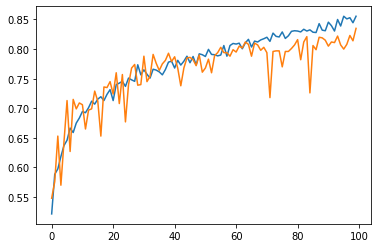

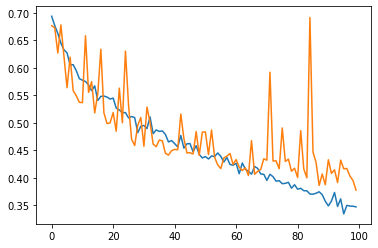

<Figure size 432x288 with 0 Axes>

In [15]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil


base_dir = "/tmp/cats_and_dogs_filtered"


localZipFile = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(localZipFile, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



training_base_dir = os.path.join(base_dir, 'train')
validation_base_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(training_base_dir, 'cats')
train_dog_dir = os.path.join(training_base_dir, 'dogs')

validation_cat_dir = os.path.join(validation_base_dir, 'cats')
validation_dog_dir = os.path.join(validation_base_dir, 'dogs')


#model

model = tf.keras.Sequential([
       tf.keras.layers.Conv2D(32, (3,3), activation= tf.nn.relu, input_shape = (150,150,3)),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(64, (3,3), activation= tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Conv2D(128, (3,3), activation= tf.nn.relu),
       tf.keras.layers.MaxPooling2D(2,2),

       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512, activation = tf.nn.relu),
       tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

#compile

model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=1e-4), metrics = ['accuracy'])

model.summary()

#Training data gen

train_data_gen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_generator = train_data_gen.flow_from_directory(
    training_base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_data_gen = ImageDataGenerator(rescale= 1./255)
validation_generator = validation_data_gen.flow_from_directory(
    validation_base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)

#plot

training_accuracy = history.history['accuracy']
trainig_loss = history.history['loss']

validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs, training_accuracy)
plt.plot(epochs, validation_accuracy)
plt.figure()


plt.plot(epochs, trainig_loss)
plt.plot(epochs, validation_loss)
plt.figure()

plt.show()

